In [1]:
#importing required packages
import sys
import os

import re #regular expression

import pandas as pd #pandas data frame for holding the data
from bs4 import BeautifulSoup #for cleaning the html boilerplate
from nltk.corpus import stopwords #import the stopword list from nltk library
from nltk.stem import WordNetLemmatizer #import the lemmatizer from nltk

from sklearn.feature_extraction.text import TfidfVectorizer #import tfidf vectorizer from scikit-learn
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression #import the logistic regression model from scikit-learn

from sklearn.metrics import confusion_matrix #import the confusion matrix
from sklearn.metrics import classification_report #import the classification report to compute recall, prec, etc


In [2]:
#loading the training dataset
train_data = pd.read_csv('/Users/meimei/Documents/UT1/Data Analytics/sentiment-analysis-of-covid-19-related-tweets/training.csv', header=0, delimiter=',')

#Show the top part of the data table
train_data.head()


,ID,Tweet,Labels
0,1,NO JOKE I WILL HOP ON A PLANE RN! (Well after ...,0 10
1,2,BanMediaHouse whose is responsible for spreadi...,6
2,3,Im waiting for someone to say to me that all t...,3 4
3,4,He is a liar. Proven day night. Time again. Li...,6
4,5,"NEW: U.S. CoronaVirus death toll reaches 4,000...",8


In [3]:
#Get the basic information about the data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      5000 non-null   int64 
 1   Tweet   5000 non-null   object
 2   Labels  5000 non-null   object
dtypes: int64(1), object(2)
memory usage: 117.3+ KB


In [4]:
#Get the X variables
X_train = train_data.drop(["Labels"], axis=1)
X_train.head()

,ID,Tweet
0,1,NO JOKE I WILL HOP ON A PLANE RN! (Well after ...
1,2,BanMediaHouse whose is responsible for spreadi...
2,3,Im waiting for someone to say to me that all t...
3,4,He is a liar. Proven day night. Time again. Li...
4,5,"NEW: U.S. CoronaVirus death toll reaches 4,000..."


In [5]:
#Get the u variables
y_train = train_data["Labels"]
y_train.head()

0    0 10
1       6
2     3 4
3       6
4       8
Name: Labels, dtype: object

<AxesSubplot:ylabel='Labels'>

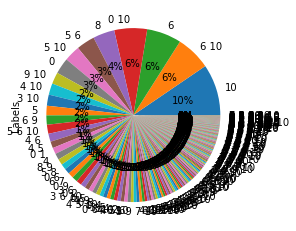

In [6]:
#Is the data balanced?
y_train.value_counts().plot(kind='pie', autopct='%1.0f%%')

In [7]:
#transforming negation abbreviated text to standard text
re_negation = re.compile("n't ") #regular expression rule

def negation_abbreviation_to_regular(abbreviated_text):
    '''
    aren't -> are not 
    '''
    regular_text = re_negation.sub(' not ', abbreviated_text)    
    return regular_text

In [8]:
#get the stopwords list from the nltk library
stopwords_list = set(stopwords.words("english"))
#print(stopwords_list)

In [9]:
#lemmatized the words
lemmatizer = WordNetLemmatizer()

def get_lemmatized_words(words_list):
    '''
        cats -> cat
        houses to house
        apples to apple
        started to start (v)
    '''    
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words_list]
    lemmatized_words = [lemmatizer.lemmatize(word, "v") for word in lemmatized_words]
    
    return lemmatized_words

In [10]:
def get_clean_review(raw_review):
    '''
        cleaning the review text
    '''
    #remove html tags from the raw review
    review_text = BeautifulSoup(raw_review).get_text()
    
    #transforming the negation abbreviated terms to regular terms
    review_text_regular = negation_abbreviation_to_regular(review_text)
    
    #removing non-alphanumeric terms
    review_text_alphanum = re.sub("[^a-zA-Z_0-9]", " ", review_text_regular)
    
    #converting the characters into lowercase
    review_text_lower_case = review_text_alphanum.lower()

    #tokenize the text into words
    review_words = review_text_lower_case.split()
    
    #removing stop words
    review_words_meaningful = [word for word in review_words if word not in stopwords_list]
    
    #lematization
    review_words_lemmatized = get_lemmatized_words(review_words_meaningful)
    
    clean_review = " ".join(review_words_lemmatized)
    return clean_review

In [11]:
#cleaning reviews
train_reviews_clean = []
for review in X_train['Tweet']:
    clean_review = get_clean_review(review)
    train_reviews_clean.append(clean_review)
    

In [12]:
#vectorization the text data
#vectorizer = TfidfVectorizer(max_features=10000, ngram_range = (1,2))
#vectorizer = TfidfVectorizer(max_features=10000, ngram_range = (1,2))
#vectorizer = HashingVectorizer(n_features=10000, ngram_range = (1,2))
vectorizer = CountVectorizer(max_features=10000, ngram_range = (1,2))
#vectorizer = CountVectorizer(ngram_range = (1,2))

In [13]:
X_train_features = vectorizer.fit_transform(train_reviews_clean)
X_train_features.shape

(5000, 10000)

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
#X_train_features, y_train = make_regression(n_features=10000, n_informative=2,random_state=0, shuffle=False)
#model= RandomForestRegressor()

In [15]:
#from sklearn import svm

In [16]:
#model = svm.SVR()

In [17]:
#Training machine learning model (Logistic regression)
# Define the model
model = LogisticRegression(random_state=0)
model.fit(X_train_features, y_train)
#print(model.intercept_)
#print(model.coef_[0])

LogisticRegression(random_state=0)

In [18]:
#prediction on the training dataset
y_train_pred = model.predict(X_train_features)

In [19]:
#confusion matrix for the training dataset
#confusion_matrix_lr = confusion_matrix(y_train, y_train_pred, labels=[1,0])
confusion_matrix_lr = confusion_matrix(y_train, y_train_pred)
onfusion_matrix_lr

NameError: name 'onfusion_matrix_lr' is not defined

In [ ]:
#classification report for the trianing dataset
cls_report = classification_report(y_train, y_train_pred)
print (cls_report)

In [ ]:
#processing the test dataset

#loading the testing dataset
test_data = pd.read_csv('/Users/meimei/Documents/UT1/Data Analytics/sentiment-analysis-of-covid-19-related-tweets/validation.csv', header=0, delimiter=',')

#Show the top part of the data table
test_data.head()


In [ ]:
test_data.info()

In [ ]:
X_test = test_data['Tweet']
X_test[0]

In [ ]:
#cleaning test reviews
test_reviews_clean = []
for review in X_test:
    clean_review = get_clean_review(review)
    test_reviews_clean.append(clean_review)

In [ ]:
#vectorize the test reviews
X_test_features = vectorizer.fit_transform(test_reviews_clean)


In [ ]:
#predict the test review features on the trained model
test_pred = model.predict(X_test_features)

In [ ]:
test_pred[0:5]

In [ ]:
test_output = pd.DataFrame(data={"ID":test_data['ID'], "Labels":test_pred})
print(test_output.head())

test_output.to_csv('/Users/meimei/Documents/UT1/Data Analytics/sentiment-analysis-of-covid-19-related-tweets/prediction.csv', index=False)